# Importing required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

# Import the CSV file 

In [3]:
data = pd.read_csv(r"C:\Users\vendr\Downloads\covtype.csv")

In [4]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# Displaying data of CSV file in the form of graph

In [5]:
print(data.shape)
print(list(data.columns))

(581012, 55)
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


In [6]:
describe = pd.DataFrame(data.describe())
describe

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
print(data.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Text(0.5, 1.0, 'Elevation')

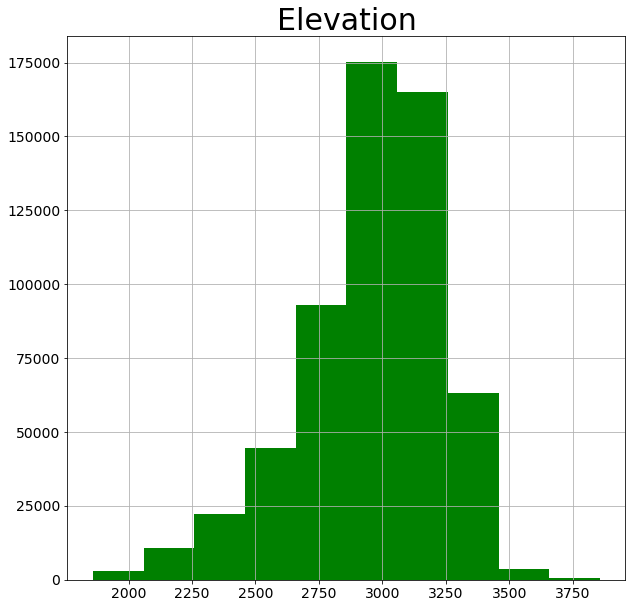

In [8]:
data["Elevation"].hist(figsize=(10,10),color='green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Elevation",fontsize=30)

Text(0.5, 1.0, 'Aspect')

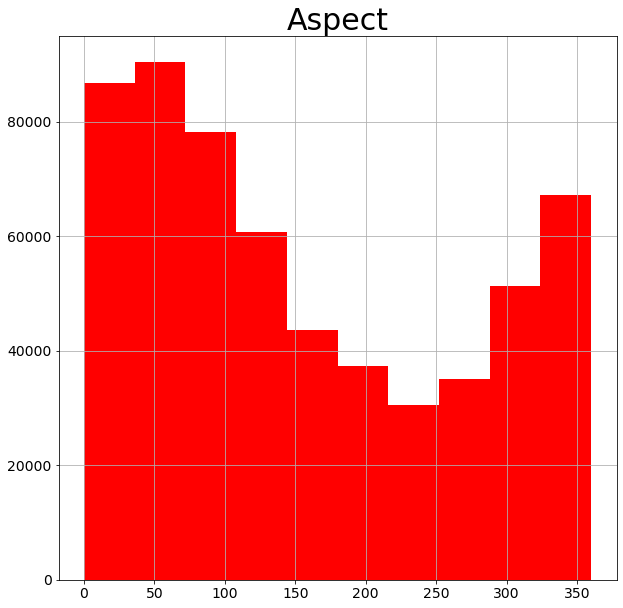

In [9]:
data["Aspect"].hist(figsize=(10,10),color='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Aspect",fontsize=30)

Text(0.5, 1.0, 'Slope')

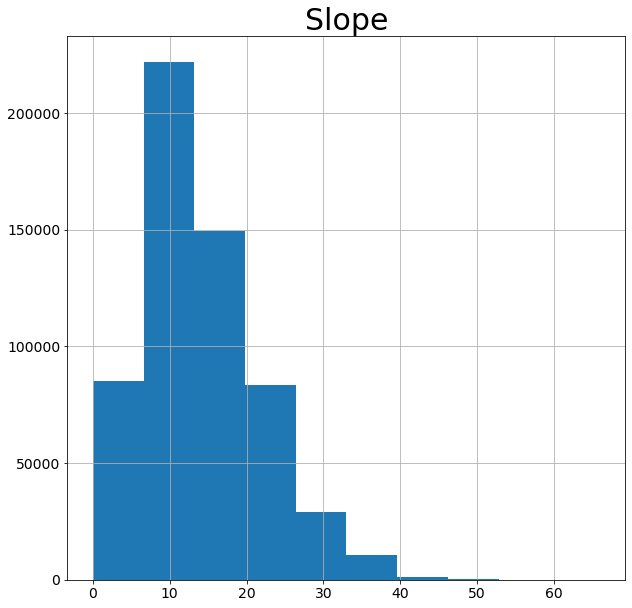

In [10]:
data["Slope"].hist(figsize=(10,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Slope",fontsize=30)

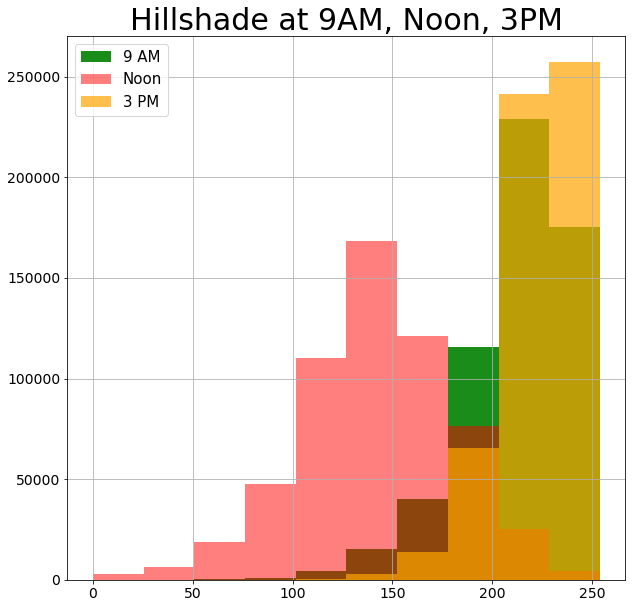

In [11]:
data["Hillshade_9am"].hist(figsize=(10,10),alpha=0.9,color='green')
data["Hillshade_3pm"].hist(figsize=(10,10),alpha=0.5,color='red')
data["Hillshade_Noon"].hist(figsize=(10,10),alpha=0.7,color='orange')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Hillshade at 9AM, Noon, 3PM",fontsize=30)
plt.legend(['9 AM','Noon','3 PM'],fontsize=15)

Text(0.5, 1.0, 'Horizontal Distance To Fire Points')

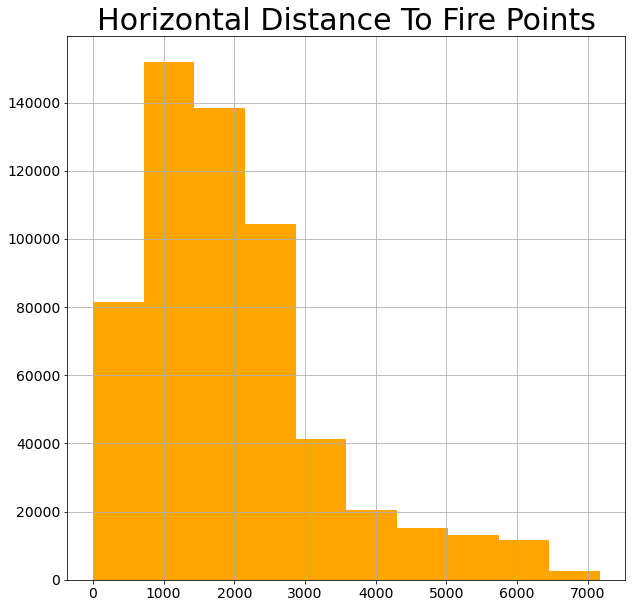

In [12]:
data["Horizontal_Distance_To_Fire_Points"].hist(figsize=(10,10),color='orange')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Horizontal Distance To Fire Points",fontsize=30)

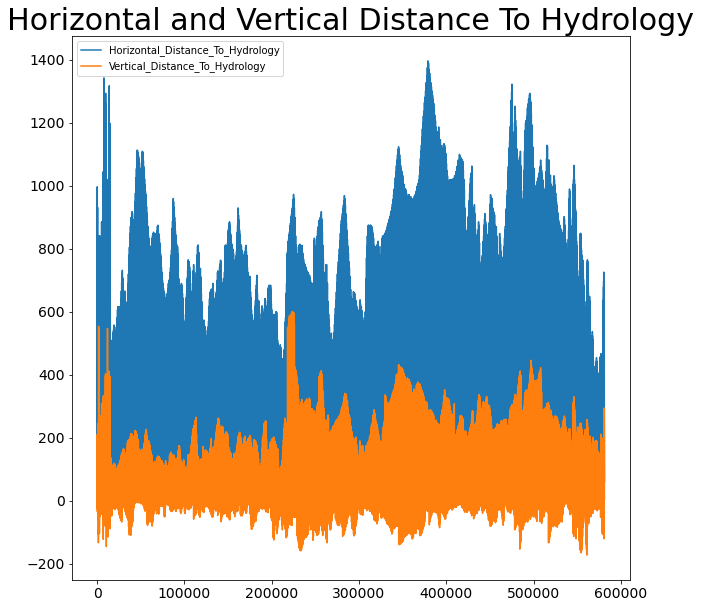

In [13]:
data["Horizontal_Distance_To_Hydrology"].plot(figsize=(10,10))
data["Vertical_Distance_To_Hydrology"].plot()
plt.title("Horizontal and Vertical Distance To Hydrology",fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)

# Spliting dataset into X and y and then to Testing and Training set

In [14]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [15]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Creating Random Forest Classifier Model and predicting values

In [17]:
rfc = RandomForestClassifier(n_estimators=6)
rfc.fit(X_train,y_train)
y_pred1 = rfc.predict(X_test)

# Creating Decision Tree Classifier Model and predicting values

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred2 = dtc.predict(X_test)

# Calculating and Displaying Accuracy of the models created

In [19]:
print("Accuracy score of Random Forest Classifier is: ",accuracy_score(y_test,y_pred1))
print("Accuracy score of Decision Tree Classifier is: ",accuracy_score(y_test,y_pred2))

Accuracy score of Random Forest Classifier is:  0.9326093130125728
Accuracy score of Decision Tree Classifier is:  0.940208084128637


# Showing a graph for Accuracy for Random Forest Classifier

Text(0.5, 1.0, 'Random Forest Classifier')

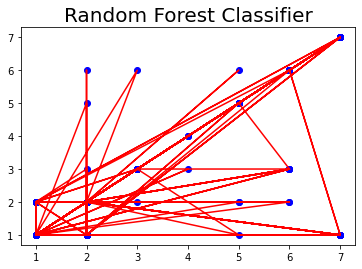

In [20]:
plt.plot(y_test[:1000],y_pred1[:1000],color='red')
plt.scatter(y_test[:1000],y_pred1[:1000],color='blue')
plt.title("Random Forest Classifier",fontsize=20)

# Showing a graph for Accuracy for Decision Tree Classifier

Text(0.5, 1.0, 'Decision Tree Classifier')

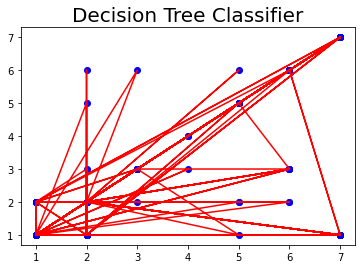

In [21]:
plt.plot(y_test[:1000],y_pred1[:1000],color='red')
plt.scatter(y_test[:1000],y_pred1[:1000],color='blue')
plt.title("Decision Tree Classifier",fontsize=20)

#  Confusion Matrix for Random Forest Classifier

In [22]:
print("Random Forest Classifier")
print(confusion_matrix(y_true=y_test,y_pred=y_pred1))

Random Forest Classifier
[[40281  2158     0     0    14     4    74]
 [ 3113 53026    97     1    83    82    10]
 [    6   224  6753    27     6   178     0]
 [    0     0    90   455     0    16     0]
 [   63   527    22     0  1298     8     0]
 [   11   225   452    11     1  2761     0]
 [  304    24     0     0     0     0  3798]]


# Confusion Matrix Graph for Random Tree Classifier

Text(0.5, 1.0, 'Random Forest Classifier')

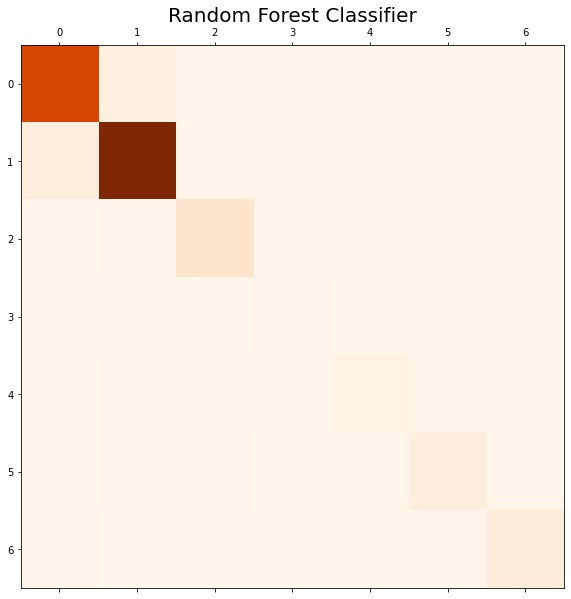

In [23]:
fig,ax=plt.subplots(figsize=(10,10))
ax.matshow(confusion_matrix(y_true=y_test,y_pred=y_pred1),cmap=plt.cm.Oranges,alpha=1.0)
plt.title("Random Forest Classifier",fontsize=20)

# Confusion Matrix for Decision Tree Classifier

In [24]:
print("Decision Tree Classifier")
print(confusion_matrix(y_true=y_test,y_pred=y_pred2))

Decision Tree Classifier
[[39970  2335     2     0    29    12   183]
 [ 2306 53609   134     1   213   117    32]
 [    2   145  6711    70    15   251     0]
 [    0     1    53   480     0    27     0]
 [   37   281    16     0  1573    11     0]
 [    7   146   272    29     5  3002     0]
 [  190    26     0     0     0     0  3910]]


Text(0.5, 1.0, 'Decision Tree Classifier')

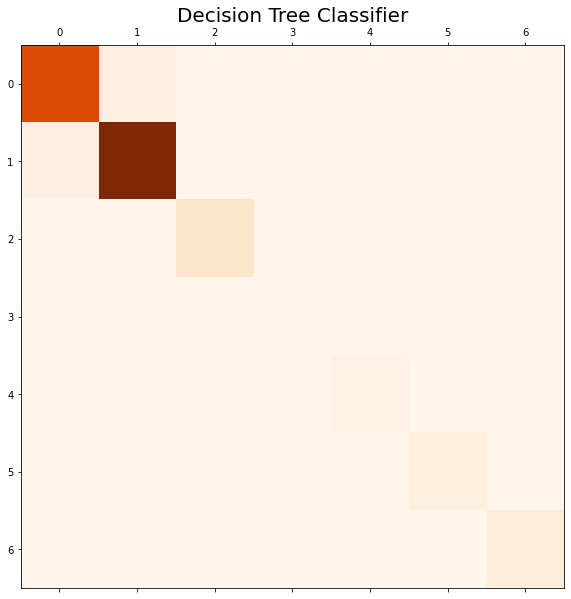

In [25]:
fig,ax=plt.subplots(figsize=(10,10))
ax.matshow(confusion_matrix(y_true=y_test,y_pred=y_pred2),cmap=plt.cm.Oranges,alpha=1.0)
plt.title("Decision Tree Classifier",fontsize=20)